# Deep Mixture Cure Model: Recurrent Neural Network
# Contents
<a href='#LoadingLibraries'>1. Load all neccessary libraries</a><br/>
<a href='#EDA'>2. Explanatory Data Analysis</a><br/>
<a href='#ChooseFeatures'>3. Choose Features from Earlier Section or External Files</a><br/>
<a href='#ImputeWinsorizeStandardize'>4. Imputation, Winsorization, Standardization</a><br/>
<a href='#TrainTestModels'>5. Train & Test the Models</a><br/>
<a href='#FeatureAnalysis'>6. Analyze Model Features Importance and their Correlation</a><br/>
<a href='#ScoreMapping'>7. Build Score Mapping Functions</a><br/>
<a href='#CreateModelPickle'>8. Create Deployable Pickle File</a><br/>
<a href='#ModelComparison'>9. Compare Model Scores against each other</a><br/>
<a href='#AnalyzeFilter'>10. Analyze the impact of various filters on training data</a><br/>
<a href='#FeatureSelectionGAXGBoost'>11. Feature Selection via Genetic Algorithm - xgboost</a><br/>
<a href='#FeatureSelectionGAXLogReg'>12. Feature Selection via Genetic Algorithm - logreg </a><br/>

# Load all neccessary libraries and data<a id='LoadingLibraries'></a>

In [2]:
import pandas as pd
import numpy as np
import lifelines


In [3]:
import multiprocessing
multiprocessing.cpu_count()

8

In [175]:
# load data and train-test split
from sklearn.model_selection import train_test_split
import random
random.seed(116)

loan_m = pd.read_csv('../mortgage/mortgage.csv')
loan_m['term'] = loan_m.time - loan_m.orig_time 
loan_m['label'] = [l if l == 1 else 0 for l in loan_m['status_time'] ]
loan_m['payoff_label'] = loan_m['payoff_time']

In [5]:
#cols_leave = ['time', 'first_time', 'payoff_time', 'status_time', 'loan_time','label','default_time', 'payoff_label', 'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time', 'investor_orig_time', 'total_obs_time', 'default_time']
#cox_var = [var for var in loan_m.columns if not var in cols_leave]
X = loan_m[cox_var].values
Y = loan_m.label.values

<AxesSubplot:>

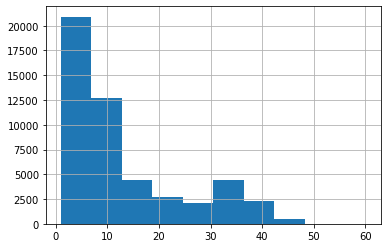

In [36]:
loan_m.groupby('id').id.count().hist()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=116, )

array([[ 1.0000e+00, -7.0000e+00,  1.1300e+02, ...,  6.9400e+01,
         9.2000e+00,  8.7030e+01],
       [ 1.0000e+00, -7.0000e+00,  1.1300e+02, ...,  6.9400e+01,
         9.2000e+00,  8.7030e+01],
       [ 1.0000e+00, -7.0000e+00,  1.1300e+02, ...,  6.9400e+01,
         9.2000e+00,  8.7030e+01],
       ...,
       [ 5.0000e+04,  1.6000e+01,  1.7700e+02, ...,  8.0000e+01,
         1.7500e+00,  1.6791e+02],
       [ 5.0000e+04,  1.6000e+01,  1.7700e+02, ...,  8.0000e+01,
         1.7500e+00,  1.6791e+02],
       [ 5.0000e+04,  1.6000e+01,  1.7700e+02, ...,  8.0000e+01,
         1.7500e+00,  1.6791e+02]])

In [8]:
from data_preprocess import *
feature_list = cox_var

In [9]:
data_process = preprocess_data(data_original =loan_m[loan_m.id < 200], feature_list = feature_list,)

In [10]:
DATA, MASK, data_mi, pat_info = data_process.preprocess()

ValueError: Grouper for 'id' not 1-dimensional

In [ ]:
DATA[0].shape

# RNN 

In [1]:
# first neural network with keras tutorial
import tensorflow as tf
from tensorflow import keras as keras
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Model
from datetime import datetime


In [2]:
import pandas as pd
df = pd.read_csv('tryout_loan.csv')

var_selection = ['first_time', 'orig_time', 'mat_time', 'balance_time', 'interest_rate_time', 'LTV_time', 
'hpi_time', 'gdp_time', 'uer_time', 
'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time', 'Interest_Rate_orig_time', 
'hpi_orig_time']

def split_data(df, var_selection, random_state):
    data_process = preprocess_data(data_original =df[df.id ], feature_list = var_selection,)
    DATA, MASK, data_mi, pat_info = data_process.preprocess()
    
    X = df[var_selection].values
    Y = df.label.values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, )
    return X_train, X_test, X_validation, y_train, y_test, y_validation



def normalize_data(train, test):



SyntaxError: unexpected EOF while parsing (<ipython-input-2-b19bd229185f>, line 22)

In [2]:
import pandas as pd
df = pd.read_csv('tryout_loan.csv')

var_selection = ['first_time', 'orig_time', 'mat_time', 'balance_time', 'interest_rate_time', 'LTV_time', 
'hpi_time', 'gdp_time', 'uer_time', 
'balance_orig_time', 'FICO_orig_time', 'LTV_orig_time', 'Interest_Rate_orig_time', 
'hpi_orig_time']

from data_preprocess import *
feature_list = var_selection
data_process = preprocess_data(data_original =df[df.id < 50], feature_list = var_selection,)
#the need to preprocess the data. we need mask of ranking, and other losses, data the match the need
a, b = data_process.construct_dataset()
DATA, MASK, data_mi, pat_info = data_process.preprocess()

In [3]:
from utils_layer import *
n_timesteps =  DATA[0].shape[1]
n_features  =  DATA[0].shape[2]

hyper_param = {'n_layer_rnn':[2], 'n_units_fnn': [128], 'n_layer_dense':[1], 
'epoch':[], 'batch_size':[]}

def build_RNN():
    l_RNN = RNN_layer(n_timesteps = n_timesteps, n_features = n_features, rnn_units = n_timesteps, n_layer_rnn = 2)
    IN_ = tf.keras.Input(shape=(n_timesteps, n_features))

    outputs_hi = Sequential(l_RNN)(IN_)
    x = attention()(outputs_hi)
    FNN = Sequential(FNN_layer(128, n_layer_dense = 1, activation_fn_dense = None, 
    drop = True, r_drop = 0.4))
    x = FNN(x)
    outputs_pi = Dense(1, activation='softmax', trainable=True)(x)
    # build path to get sequence output and pi
    M = keras.Model(inputs = IN_, outputs = [outputs_hi, outputs_pi])
    return M

def build_DH():
    l_RNN = RNN_layer(n_timesteps = n_timesteps, n_features = n_features, rnn_units = n_timesteps, n_layer_rnn = 2)
    IN_ = tf.keras.Input(shape=(n_timesteps, n_features))
    x = Sequential(l_RNN)(IN_)
    x = attention()(x)

    FNN = Sequential(FNN_layer(128, n_layer_dense = 2, activation_fn_dense = None, 
    drop = True, r_drop = 0.4))
    x_1 = FNN(x)
    x_2 = FNN(x)
    outputs_pi = Dense(1, activation='sigmoid', trainable=True)(x_1)
    outputs_hi = Dense(n_timesteps, activation='softmax', trainable=True)(x_2)

    # build path to get sequence output and pi
    M = keras.Model(inputs = IN_, outputs = [outputs_pi, outputs_hi])
    return M

In [4]:
M_RNN = build_RNN()
M_DDH = build_DH()

In [5]:
from utils_lossFun import *

In [11]:
OUT_hi, OUT_pi = M_RNN(inputs = DATA[0]) 
OUT_hi = tf.sigmoid(OUT_hi[:, -1, :])
batch_index = range(len(DATA[0]))
input = DATA[0][batch_index]
censoring_status = DATA[2][batch_index]
payoff_status    = DATA[3][batch_index]

get_loss_fun  = get_loss(batch_index, pat_info, MASK, OUT_pi, OUT_hi, censoring_status, payoff_status, RNN_net = True)
print(get_loss_fun.loss_likelihood_mixture())
print(get_loss_fun.loss_Ranking())
print(get_loss_fun.AUC())
print(get_loss_fun.ANLP())
print(get_loss_fun.c_index())

(<tf.Tensor: shape=(), dtype=float32, numpy=72.61441>, (<tf.Tensor: shape=(), dtype=float32, numpy=-117.15029>, <tf.Tensor: shape=(), dtype=float32, numpy=-86.38081>, <tf.Tensor: shape=(), dtype=float32, numpy=-0.5457291>))
tf.Tensor(12.676245, shape=(), dtype=float32)
tf.Tensor(0.5, shape=(), dtype=float32)
tf.Tensor([6.1700583], shape=(1,), dtype=float32)
([0.257185332011893, 0.257185332011893, 0.257185332011893, 0.257185332011893], [array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1], dtype=int64), array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1], dtype=int64), array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1], dtype=int64), array([0, 1

In [9]:
OUT_pi, OUT_hi = M_DDH(inputs = DATA[0]) 
batch_index = range(len(DATA[0]))
input = DATA[0][batch_index]
censoring_status = DATA[2][batch_index]
payoff_status    = DATA[3][batch_index]

get_loss_fun  = get_loss(batch_index, pat_info, MASK, OUT_pi, OUT_hi, censoring_status,
    payoff_status, RNN_net = False)
print(get_loss_fun.loss_likelihood_mixture())
print(get_loss_fun.loss_Ranking())
print(get_loss_fun.AUC())
print(get_loss_fun.ANLP())
print(get_loss_fun.c_index())

(<tf.Tensor: shape=(), dtype=float32, numpy=42.03351>, (<tf.Tensor: shape=(), dtype=float32, numpy=-2.3774624>, <tf.Tensor: shape=(), dtype=float32, numpy=-64.126434>, <tf.Tensor: shape=(), dtype=float32, numpy=-37.503716>))
tf.Tensor(10.153954, shape=(), dtype=float32)
tf.Tensor(0.203125, shape=(), dtype=float32)
tf.Tensor([3.7386875], shape=(1,), dtype=float32)
([0.25520317145688803, 0.5535183349851338, 0.6947472745292369, 0.6947472745292369], [array([4, 7, 5, 5, 5, 5, 7, 4, 0, 5, 7, 7, 7, 7, 7, 5, 7, 5, 7, 7, 7, 7,
       7, 0, 5, 5, 5, 0, 5, 5, 5, 7, 5, 7, 5, 7, 7, 7, 5, 7, 7, 7, 7, 7,
       5, 5, 7, 7, 5], dtype=int64), array([ 4,  7,  5, 17,  5, 17,  7,  4, 17,  5,  7,  7,  7,  7,  7, 17,  7,
       17,  7,  7,  7,  7,  7, 17,  5, 17,  5, 17,  5,  5, 17,  7,  5,  7,
        5,  7,  7,  7,  5,  7,  7,  7,  7,  7,  5,  5,  7,  7,  5],
      dtype=int64), array([35, 28, 35, 35, 35, 35, 28, 35, 28, 35, 28, 28, 28, 28, 28, 35, 28,
       28, 28, 28, 28, 28, 28, 35, 35, 35, 28, 35, 35

In [7]:
MASK[0][0][batch_index].shape
MASK[1].shape

(6, 42)

In [27]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

def train_step(batch_index, input, MASK, censoring_status, payoff_status):
    with tf.GradientTape() as tape:
        # make a prediction using the model and then calculate the
        # loss
        OUT_pi, OUT_hi = M(inputs = input)  #output shape (batch_size, 1)

        get_loss_fun  = get_loss(batch_index, MASK, OUT_pi, OUT_hi, censoring_status,
    payoff_status, RNN_net = True)

        loss_m = get_loss_fun.loss_likelihood_mixture()
        loss_ranking = get_loss_fun.loss_Ranking()
        
        loss = loss_m + loss_ranking
        #loss = tf.math.sqrt(abs(loss_1))*0.3 + loss_2*0.7
    # moniter susceptible ratio for default cases:
    acc   = tf.keras.metrics.AUC(int(len(censoring_status)/2))
    acc.update_state(censoring_status[censoring_status + payoff_status == 1], 
        OUT_p_i_[censoring_status + payoff_status == 1]
        )

    gradients = tape.gradient(loss, path_RNN.trainable_variables)
    optimizer.apply_gradients(zip(gradients, path_RNN.trainable_variables))

    return acc.result().numpy(), loss.numpy()

#def test_step():


In [28]:
hyper_para = {'num_epochs': 100, }

In [29]:
num_epochs = hyper_para['num_epochs']
train_loss_results = []
train_accuracy_results = []

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_loss_avg.reset_states()
    for i in range(1200):
        batch_index = range(i*1, i*1 + 1)
        input = DATA[0][batch_index]
        censoring_status = DATA[2][batch_index]
        payoff_status    = DATA[3][batch_index]
        score, loss,  = train_step(batch_index, input, MASK, censoring_status, payoff_status)

        epoch_loss_avg.update_state(loss)
        train_accuracy_results.append(score)
        train_loss_results.append(epoch_loss_avg.result())
        
        if i % 300 == 0:
            print("it {:03d}: Loss: {:.3f}, AUC: {:.3%}".format(i, epoch_loss_avg.result(), tf.math.reduce_mean(train_accuracy_results[-300:])))
    
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
     epoch_loss_avg.result(),
     tf.math.reduce_mean(train_accuracy_results[-15000:])))
    print('===================================')

ValueError: Shapes (1, 42) and (1, 1) are incompatible

In [ ]:
pd.DataFrame(train_loss_results).to_csv('RNN_loss.csv')
pd.DataFrame(train_accuracy_results).to_csv('RNN_accuracy.csv')

In [ ]:
#compute loss
#log_likelihood
def Prob_Surv(batch_index, data, mask, OUT_h_i, RNN_net = True, ):
    if RNN_net == True:
        (mask_1, mask_2, mask_3) = mask #MASK[0]
    
    mask_1 = tf.constant(mask_1[batch_index], shape = OUT_h_i.shape, dtype = 'float32')
    mask_2 = tf.constant(mask_2[batch_index], shape = OUT_h_i.shape, dtype = 'float32')
    mask_3 = tf.constant(mask_3[batch_index], shape = OUT_h_i.shape, dtype = 'float32')

    h_i = tf.reshape(tf.math.multiply(OUT_h_i, mask_1), mask_1.shape, name='h_i')
    S_t = tf.reshape(tf.math.reduce_prod(1- h_i, axis=1, keepdims=False, name='S_i'),
    (len(batch_index), 1))

    h_last = tf.reduce_sum(tf.reshape(tf.math.multiply(OUT_h_i, mask_2), mask_2.shape), axis = 1) 
    # shape (batch_size, 1) unwanted points == 0
    mul_h = tf.math.reduce_prod(1- tf.math.multiply(OUT_h_i, mask_3, mask_3.shape,), axis=1)  # (50, 1)
    p_il = tf.reshape(tf.math.multiply(h_last, mul_h), (len(batch_index), 1))

    return p_il, S_t

def loss_likelihood(p_i, Prob, S_t, 
censoring_status, payoff_status, alpha = 0.6):   # censoring case == 0
    #weigths_censored   =  
    #weigths_uncensored = 
    
    # censored data
    l_censored = tf.math.add(tf.math.subtract(1, p_i), tf.math.multiply(p_i, S_t))
    l_censored = l_censored[censoring_status == 0]
    l_censored = tf.reduce_sum(
        tf.math.log(l_censored)
        )
        
    # uncensored data, true event time z
    l_uncensored = tf.math.multiply(p_i, Prob)
    l_uncensored = l_uncensored[censoring_status == 1]
    l_uncensored = tf.reduce_sum(
        tf.math.log(l_uncensored)
        )

    l_mixture = l_censored + l_uncensored

    # punishment of t>z
    l_uncensored_2 = tf.reduce_sum(
        tf.math.log((1-S_t)[censoring_status == 1])
        )
    
    l_censored_2 = tf.reduce_sum(
        tf.math.log((S_t)[censoring_status == 0])
        )

    l_c = l_uncensored_2 + l_censored_2 
    return -(alpha*l_mixture + (1-alpha)*l_c) 

In [ ]:
batch_index = range(-5000, 0)
input = DATA[0][batch_index]
censoring_status = DATA[2][batch_index]
payoff_status    = DATA[3][batch_index]

OUT_h_i_ = tf.math.sigmoid(path_1(inputs = input)[:,-1, :])  #output shape (batch_size, timestep, 1)
OUT_p_i_ = path_RNN(inputs = input)  #output shape (batch_size, 1)
p_il, S_t = Prob_Surv(batch_index, input, MASK[0], OUT_h_i_,)
loss_1 = loss_likelihood(OUT_p_i_, p_il, S_t, censoring_status, payoff_status)

In [ ]:
acc   = tf.keras.metrics.AUC(int(len(censoring_status)/2))
acc.update_state(censoring_status[censoring_status + payoff_status == 1], 
        OUT_p_i_[censoring_status + payoff_status == 1]
        )
acc.result()

In [ ]:
censoring_status[censoring_status + payoff_status == 1][:20]

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i.numpy() for i in train_loss_results])

In [9]:
from lifelines.utils import concordance_index
def c_index(batch_index, OUT_hi, pat_info, RNN = False):
    pil_matrix = np.zeros(OUT_hi.shape)
    pil_matrix[:, 0] = OUT_hi[:, 0]
    for i in range(n_timesteps):
        if i == 0:
            pass
        else:
            temp_h = OUT_hi[:, i]
            temp_h_1 = tf.math.subtract(1, OUT_hi)[:, :i-1]
            h = tf.reduce_prod(temp_h_1, axis = 1)
            pil_matrix[:, i] = tf.math.multiply(temp_h, h).numpy()

    names = batch_index
    events = pat_info[:, 3][batch_index]
    pred_cindex = []
    preds_t = []
    for i in [12, 24, 36, 48]:
        preds = tf.math.argmax(pil_matrix[:, :i], axis = 1).numpy()
        res = concordance_index(events, preds)
        pred_cindex.append(res)
        preds_t.append(preds)
    return pred_cindex, preds_t, pil_matrix, 

In [15]:
pred_cindex

[0.38571428571428573,
 0.38571428571428573,
 0.38571428571428573,
 0.38571428571428573]

In [ ]:
for i in [12, 24, 36, 48]:
    events = pat_info[:, 3][batch_index]
    preds = tf.math.argmax(OUT_h_i_[:, :i], axis = 1).numpy()
    print(concordance_index(events, preds))

In [ ]:
x = tf.nn.softmax(pil_matrix, axis = 1)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
for i in range(len(OUT_h_i_)):
    plt.plot(range(n_timesteps), x[i,:])

In [ ]:
id = 17
plt.plot(range(n_timesteps), b[id,:])
print(pat_info[:, 3][id])
print(censoring_status[id])